# **Análisis Exploratorio de Datos**

# **Librerias Importadas**

In [44]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# **Información del dataset**

### **Creación del Dataset**

In [45]:

# Ruta al archivo CSV
rentacsv = '/content/drive/MyDrive/Rentabilidad_2016_2021.csv'

# Importar el archivo CSV a un DataFrame
df = pd.read_csv(rentacsv)

# Mostrar las primeras filas del DataFrame
print(df.head())


  FECHA_CORTE  TIPO_ENTIDAD                NOMBRE_TIPO_ENTIDAD  \
0  2016-01-01             5             SF-SOCIEDAD FIDUCIARIA   
1  2016-01-01             5             SF-SOCIEDAD FIDUCIARIA   
2  2016-01-01            85  COMISIONISTAS DE BOLSA DE VALORES   
3  2016-01-01            85  COMISIONISTAS DE BOLSA DE VALORES   
4  2016-01-01            85  COMISIONISTAS DE BOLSA DE VALORES   

   CODIGO_ENTIDAD                   NOMBRE_ENTIDAD  TIPO_NEGOCIO  \
0              20  Fiduciaria Corficolombiana S.A.             9   
1              40                       Fiducoldex             9   
2              28                Credicorp Capital             9   
3              21           Profesionales De Bolsa             9   
4              14                      Btg Pactual             9   

          NOMBRE_TIPO_PATRIMONIO  SUBTIPO_NEGOCIO  NOMBRE_SUBTIPO_PATRIMONIO  \
0  FONDOS DE INVERSIÓN COLECTIVA                1        FIC DE TIPO GENERAL   
1  FONDOS DE INVERSIÓN COLECTIVA  

### **Identificación NA's**

Buscamos identificar la cantidad de valores faltantes en la base de datos.

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300007 entries, 0 to 1300006
Data columns (total 26 columns):
 #   Column                                            Non-Null Count    Dtype  
---  ------                                            --------------    -----  
 0   FECHA_CORTE                                       1300007 non-null  object 
 1   TIPO_ENTIDAD                                      1300007 non-null  int64  
 2   NOMBRE_TIPO_ENTIDAD                               1300007 non-null  object 
 3   CODIGO_ENTIDAD                                    1300007 non-null  int64  
 4   NOMBRE_ENTIDAD                                    1300007 non-null  object 
 5   TIPO_NEGOCIO                                      1300007 non-null  int64  
 6   NOMBRE_TIPO_PATRIMONIO                            1300007 non-null  object 
 7   SUBTIPO_NEGOCIO                                   1300007 non-null  int64  
 8   NOMBRE_SUBTIPO_PATRIMONIO                         1300007 non-null  obje

In [47]:
df.isna().sum()

,0
FECHA_CORTE,0
TIPO_ENTIDAD,0
NOMBRE_TIPO_ENTIDAD,0
CODIGO_ENTIDAD,0
NOMBRE_ENTIDAD,0
TIPO_NEGOCIO,0
NOMBRE_TIPO_PATRIMONIO,0
SUBTIPO_NEGOCIO,0
NOMBRE_SUBTIPO_PATRIMONIO,0
CODIGO_NEGOCIO,0


### **Información General**

```{important}
En algunas variables fue utilizada la transformación logarítmica con el objetivo de visualizar mejor la distribución original de los datos, puesto la mayoría de variables tiene datos con unidades extremadamente grandes, lo que dificultó en un principio el análisis de las mismas.
```

In [ ]:
df.describe()

,TIPO_ENTIDAD,CODIGO_ENTIDAD,TIPO_NEGOCIO,SUBTIPO_NEGOCIO,CODIGO_NEGOCIO,PRINCIPAL_COMPARTIMENTO,TIPO_PARTICIPACION,RENDIMIENTOS_ABONADOS,PRECIERRE_FONDO_DIA_T,NUMERO_UNIDADES_FONDO_CIERRE_OPER_DIA_T_ANTERIOR,VALOR_UNIDAD_OPERACIONES_DIA_T,APORTES_RECIBIDOS,RETIROS_REDENCIONES,ANULACIONES,VALOR_FONDO_CIERRE_DIA_T,NUMERO_INVERSIONISTAS,RENTABILIDAD_DIARIA,RENTABILIDAD_MENSUAL,RENTABILIDAD_SEMESTRAL,RENTABILIDAD_ANUAL
count,1.300007e+06,1.300007e+06,1300007.0,1.300007e+06,1.300007e+06,1.300007e+06,1.300007e+06,1.300007e+06,1.300007e+06,1.300007e+06,1.300007e+06,1.300007e+06,1.300007e+06,1.300007e+06,1.300007e+06,1.300007e+06,1.300007e+06,1.300007e+06,1.300007e+06,1.300007e+06
mean,3.442933e+01,2.710196e+01,9.0,2.770966e+00,5.027881e+04,1.199993e+00,6.500195e+02,1.890310e+07,1.611441e+11,6.598879e+11,1.157358e+05,3.088307e+09,3.037605e+09,-2.286747e+07,1.611709e+11,5.209843e+03,3.180150e+26,2.096465e+26,4.633448e+16,7.713861e+07
std,3.865099e+01,1.885390e+01,0.0,2.673459e+00,2.554373e+04,3.999947e-01,1.497363e+02,2.155705e+09,6.371159e+11,5.204966e+13,3.362218e+06,2.243997e+10,2.217504e+10,1.728039e+09,6.371320e+11,2.499272e+06,1.035133e+29,2.737937e+28,5.282958e+19,8.770580e+10
min,5.000000e+00,3.000000e+00,9.0,1.000000e+00,2.713000e+03,1.000000e+00,5.000000e+00,-7.100906e+11,-5.865346e+10,0.000000e+00,0.000000e+00,-1.997390e-01,-1.249060e+07,-6.499977e+11,-5.642586e+10,0.000000e+00,-1.080231e+14,-1.113881e+04,-2.475177e+02,-1.534884e+02
25%,5.000000e+00,1.600000e+01,9.0,1.000000e+00,2.574300e+04,1.000000e+00,5.040000e+02,-1.622053e+04,4.669345e+09,3.663416e+05,9.997565e+03,0.000000e+00,0.000000e+00,0.000000e+00,4.676455e+09,3.000000e+00,-1.652880e-01,-3.054225e-01,0.000000e+00,0.000000e+00
50%,5.000000e+00,2.100000e+01,9.0,1.000000e+00,5.892100e+04,1.000000e+00,7.020000e+02,7.118279e+05,2.507828e+10,1.808714e+06,1.201734e+04,0.000000e+00,0.000000e+00,0.000000e+00,2.508887e+10,2.200000e+01,2.646109e+00,3.810992e+00,3.957519e+00,3.763481e+00
75%,8.500000e+01,3.100000e+01,9.0,7.000000e+00,6.740300e+04,1.000000e+00,8.000000e+02,1.039454e+07,1.014578e+11,7.891836e+06,1.668354e+04,1.211798e+06,4.454755e+06,0.000000e+00,1.014693e+11,2.360000e+02,6.653085e+00,7.502263e+00,7.285516e+00,6.718203e+00
max,8.700000e+01,9.700000e+01,9.0,7.000000e+00,1.033280e+05,2.000000e+00,8.180000e+02,5.183557e+11,1.589805e+13,7.590329e+15,7.322737e+08,1.013510e+13,1.013500e+13,4.572483e+11,1.589993e+13,2.849427e+09,5.878116e+31,6.435146e+30,6.023515e+22,1.000000e+14


In [ ]:
df.describe(include='object')

,FECHA_CORTE,NOMBRE_TIPO_ENTIDAD,NOMBRE_ENTIDAD,NOMBRE_TIPO_PATRIMONIO,NOMBRE_SUBTIPO_PATRIMONIO,NOMBRE_PATRIMONIO
count,1300007,1300007,1300007,1300007,1300007,1300007
unique,2192,3,46,1,5,660
top,2021-12-30,SF-SOCIEDAD FIDUCIARIA,Alianza Fiduciaria S.A.,FONDOS DE INVERSIÓN COLECTIVA,FIC DE TIPO GENERAL,FONDO ABIERTO ALIANZA
freq,808,822895,203419,1300007,869357,25206


#### **Mapa de Correlación**

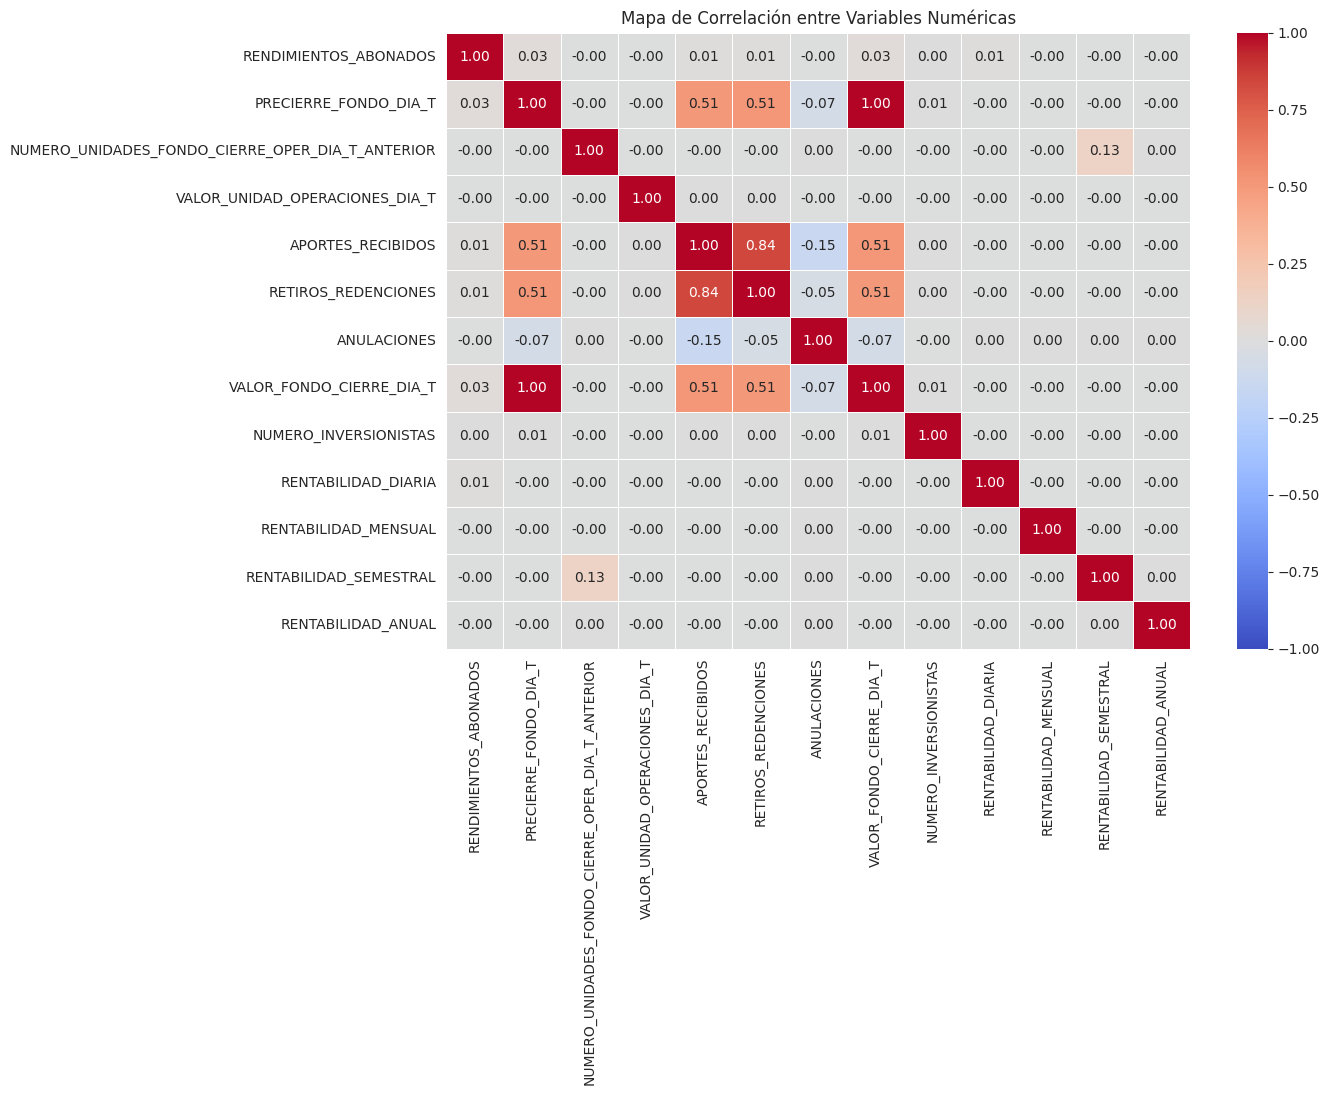

In [ ]:
# Seleccionar solo las columnas numéricas
df_numeric = df.select_dtypes(include=["float64"])

# Calcular la matriz de correlación
corr = df_numeric.corr()

# Crear el mapa de calor
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5, vmin=-1, vmax=1)

# Título y visualización
plt.title("Mapa de Correlación entre Variables Numéricas")
plt.show()

## **Análisis Univariado**

### **Tipo de Entidad** (`TIPO_ENTIDAD`)/ **Nombre Entidad** (`NOMBRE_TIPO_ENTIDAD`)




Creamos un diagrama de barras horizontales para ver la frecuencia de cada tipo de entidad.

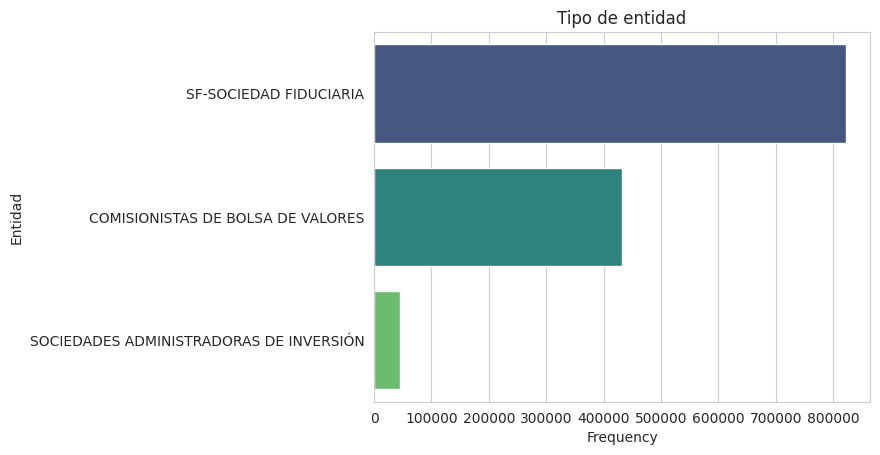

In [51]:
sns.set_style("whitegrid")
# Contar las frecuencias de cada categoría y ordenar de mayor a menor
orden = df['NOMBRE_TIPO_ENTIDAD'].value_counts().index

# Crear el gráfico de barras horizontal
plt.title('Tipo de entidad')
sns.countplot(y=df['NOMBRE_TIPO_ENTIDAD'], order=orden, orient='h', palette='viridis')
plt.ylabel('Entidad')
plt.xlabel('Frequency')
plt.show()

### **Principal Compartimento** (`PRINCIPAL_COMPARTIMENTO`)



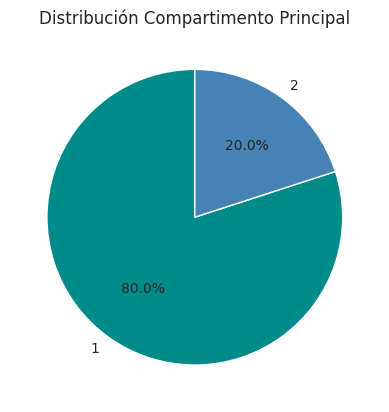

,proportion
PRINCIPAL_COMPARTIMENTO,
1,80.000723
2,19.999277


In [52]:
sex_count = df["PRINCIPAL_COMPARTIMENTO"].value_counts()
plt.pie(sex_count, labels = sex_count.index, autopct="%1.1f%%", startangle=90, colors = ["darkcyan", "steelblue"] )
plt.title("Distribución Compartimento Principal")
plt.show()
df["PRINCIPAL_COMPARTIMENTO"].value_counts()
df["PRINCIPAL_COMPARTIMENTO"].value_counts(normalize=True) * 100

### **Número de unidades de fondo registradas al cierre del día anterior a la fecha** (`NUMERO_UNIDADES_FONDO_CIERRE_OPER_DIA_T_ANTERIOR`)

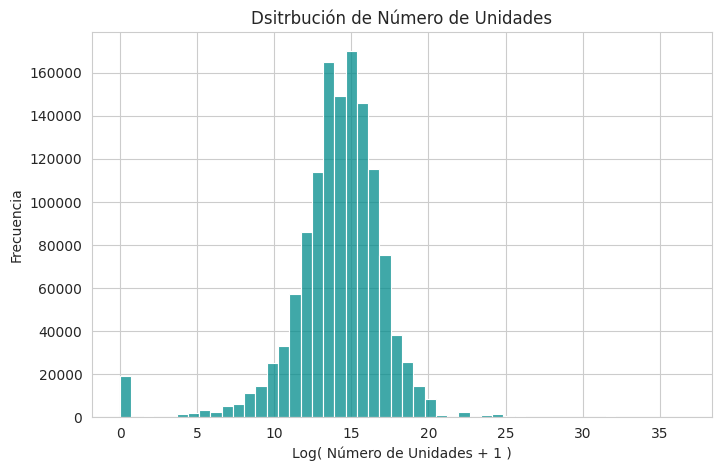

In [53]:
df["log_NUMERO_UNIDADES"] = np.log1p(df["NUMERO_UNIDADES_FONDO_CIERRE_OPER_DIA_T_ANTERIOR"])

plt.figure(figsize=(8, 5))
sns.histplot(df["log_NUMERO_UNIDADES"].dropna(), bins=50, color="darkcyan")
plt.xlabel("Log( Número de Unidades + 1 )")
plt.ylabel("Frecuencia")
plt.title("Dsitrbución de Número de Unidades")
plt.show()


### **Rendimientos Abonados** (`RENDIMIENTOS_ABONADOS`)

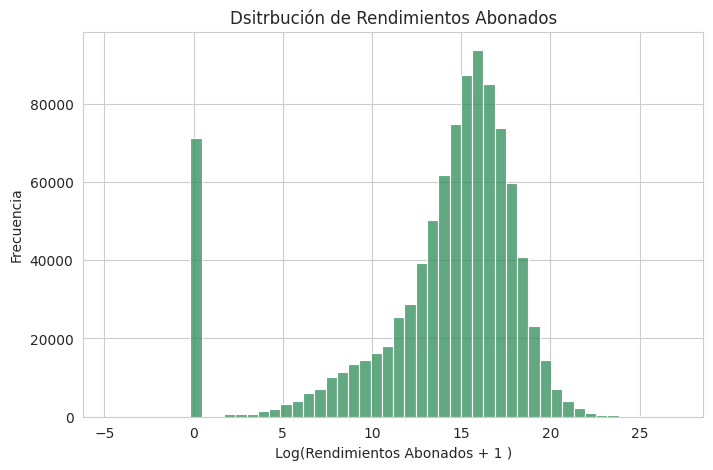

In [54]:
df["log_rendi"] = np.log1p(df["RENDIMIENTOS_ABONADOS"])

plt.figure(figsize=(8, 5))
sns.histplot(df["log_rendi"].dropna(), bins=50, color="seagreen")
plt.xlabel("Log(Rendimientos Abonados + 1 )")
plt.ylabel("Frecuencia")
plt.title("Dsitrbución de Rendimientos Abonados")
plt.show()

### **Distribución de Rentabilidades (*Diaria, Mensual, Semestral, Anual*)**

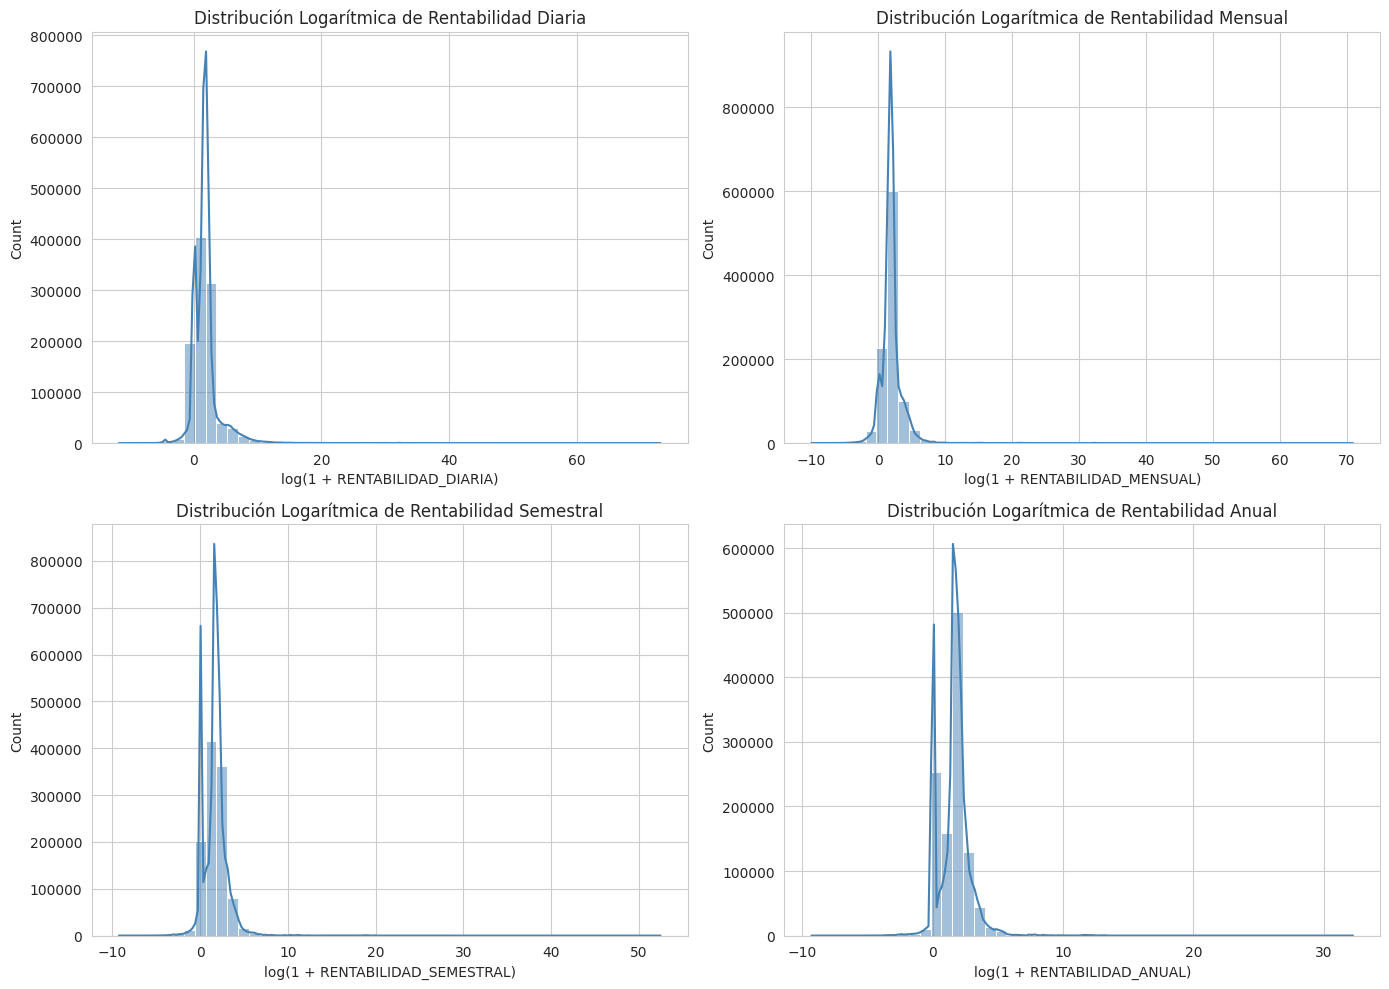

In [55]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Columnas y títulos
cols = ["RENTABILIDAD_DIARIA", "RENTABILIDAD_MENSUAL", "RENTABILIDAD_SEMESTRAL", "RENTABILIDAD_ANUAL"]
titles = ["Diaria", "Mensual", "Semestral", "Anual"]

# Crear histogramas con transformación logarítmica
for i, ax in enumerate(axes.flatten()):
    sns.histplot(np.log1p(df[cols[i]]), bins=50, kde=True, ax=ax, color="steelblue")
    ax.set_title(f"Distribución Logarítmica de Rentabilidad {titles[i]}")
    ax.set_xlabel(f"log(1 + {cols[i]})")  # Etiqueta del eje X con la transformación aplicada

# Ajustar diseño
plt.tight_layout()
plt.show()

## **Análisis Bivariado**

### **Número de Inversionistas por Subtipo de Negocio/Nombre de Patrimonio**






Creamos un diagrama de cajas y bigotes para el numero de inversionistas por cada subtipo de negocio.

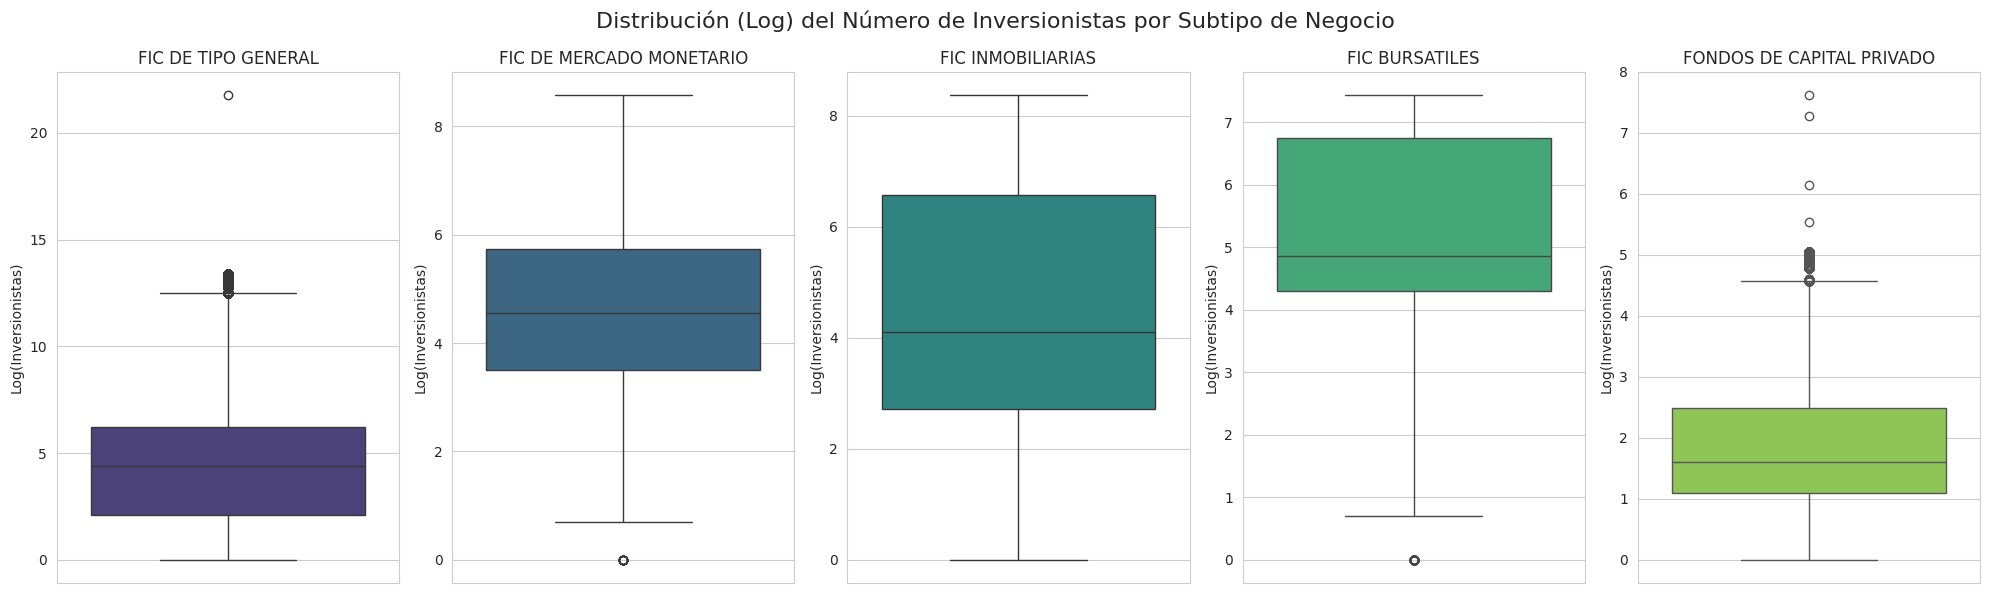

In [56]:
# Filtrar los subtipos de negocio relevantes
subtipos = [1, 2, 3, 6, 7]
df_filtrado = df[df["SUBTIPO_NEGOCIO"].isin(subtipos)].copy()

# Aplicar transformación logarítmica (sumar 1 para evitar log(0))
df_filtrado["LOG_NUMERO_INVERSIONISTAS"] = np.log1p(df_filtrado["NUMERO_INVERSIONISTAS"])

# Crear diccionario de nombres de subtipos
mapeo_nombres = df_filtrado.drop_duplicates("SUBTIPO_NEGOCIO").set_index("SUBTIPO_NEGOCIO")["NOMBRE_SUBTIPO_PATRIMONIO"].to_dict()

# Crear subgráficos (Antes y Después de transformación logarítmica)
fig, axes = plt.subplots(1, len(subtipos), figsize=(20, 6), sharey=False)

# Paleta de colores
palette = sns.color_palette("viridis", len(subtipos))

for i, subtipo in enumerate(subtipos):
    sns.boxplot(data=df_filtrado[df_filtrado["SUBTIPO_NEGOCIO"] == subtipo],
                y="LOG_NUMERO_INVERSIONISTAS",
                ax=axes[i],
                color=palette[i])

    axes[i].set_title(mapeo_nombres.get(subtipo, f"Subtipo {subtipo}"))
    axes[i].set_xlabel("")
    axes[i].set_ylabel("Log(Inversionistas)")

# Ajustar diseño y mostrar
plt.suptitle("Distribución (Log) del Número de Inversionistas por Subtipo de Negocio", fontsize=16)
plt.tight_layout()
plt.show()

### **Aportes Recibidos por Tipo de Entidad**

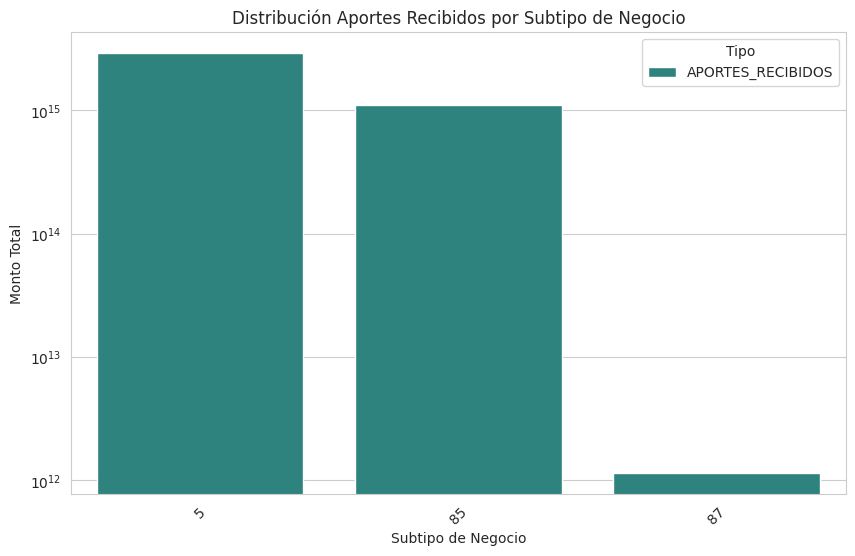

In [57]:

# Agrupar por subtipo de negocio y calcular la suma de aportaciones y retiros
df_grouped = df.groupby("TIPO_ENTIDAD")["APORTES_RECIBIDOS"].sum().reset_index()

# Transformar los datos para que seaborn lo entienda mejor
df_melted = df_grouped.melt(id_vars="TIPO_ENTIDAD", var_name="Tipo", value_name="Monto")

# Crear el gráfico
plt.figure(figsize=(10,6))
sns.barplot(data=df_melted, x="TIPO_ENTIDAD", y="Monto", hue="Tipo", palette='viridis')
plt.yscale("log")


# Personalización
plt.xlabel("Subtipo de Negocio")
plt.ylabel("Monto Total")
plt.title("Distribución Aportes Recibidos por Subtipo de Negocio")
plt.xticks(rotation=45)

# Mostrar gráfico
plt.show()


### **Relación entre Valor total del fondo al cierre del día T y Precio de cierre del fondo en el día T**

Dado que en el mapa de correlación estas dos variables tuvieron un coeficiente de relación perfecto, creamos una diagrama de dispersión para ver la relación graficamente.

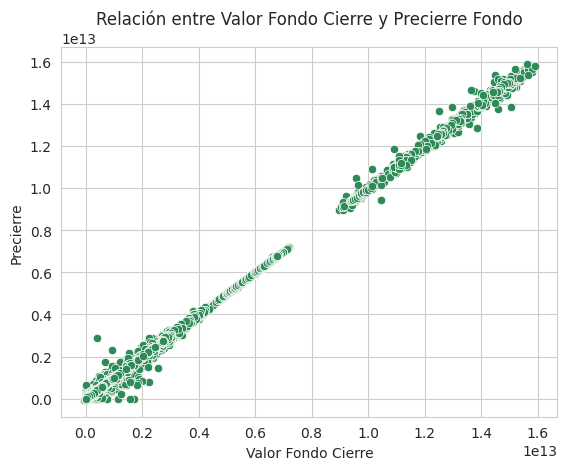

In [58]:
sns.scatterplot(data=df, x="VALOR_FONDO_CIERRE_DIA_T", y="PRECIERRE_FONDO_DIA_T", color='seagreen')

plt.xlabel("Valor Fondo Cierre")
plt.ylabel("Precierre")
plt.title("Relación entre Valor Fondo Cierre y Precierre Fondo")
plt.show()

### **Rentabilidad Anual por el Tipo de Entidad**

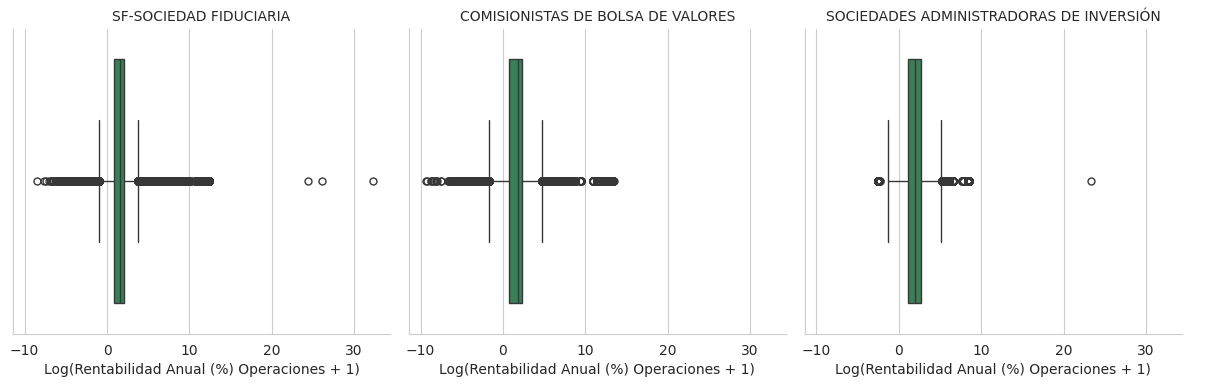

In [59]:
# Aplicar transformación logarítmica a las variables
df["log_RENTABILIDAD_ANUAL"] = np.log1p(df["RENTABILIDAD_ANUAL"])

# Graficar boxplots con los valores transformados
g = sns.catplot(
    data=df,
    x="log_RENTABILIDAD_ANUAL",
    col="NOMBRE_TIPO_ENTIDAD",
    kind="box",
    col_wrap=3,
    height=4,
    sharex=True,
    color='seagreen'
)

# Ajustar títulos
g.set_axis_labels("Log(Rentabilidad Anual (%) Operaciones + 1)", "")
g.set_titles("{col_name}")

plt.show()


### **Anulaciones por Mes (Fecha de Corte)**

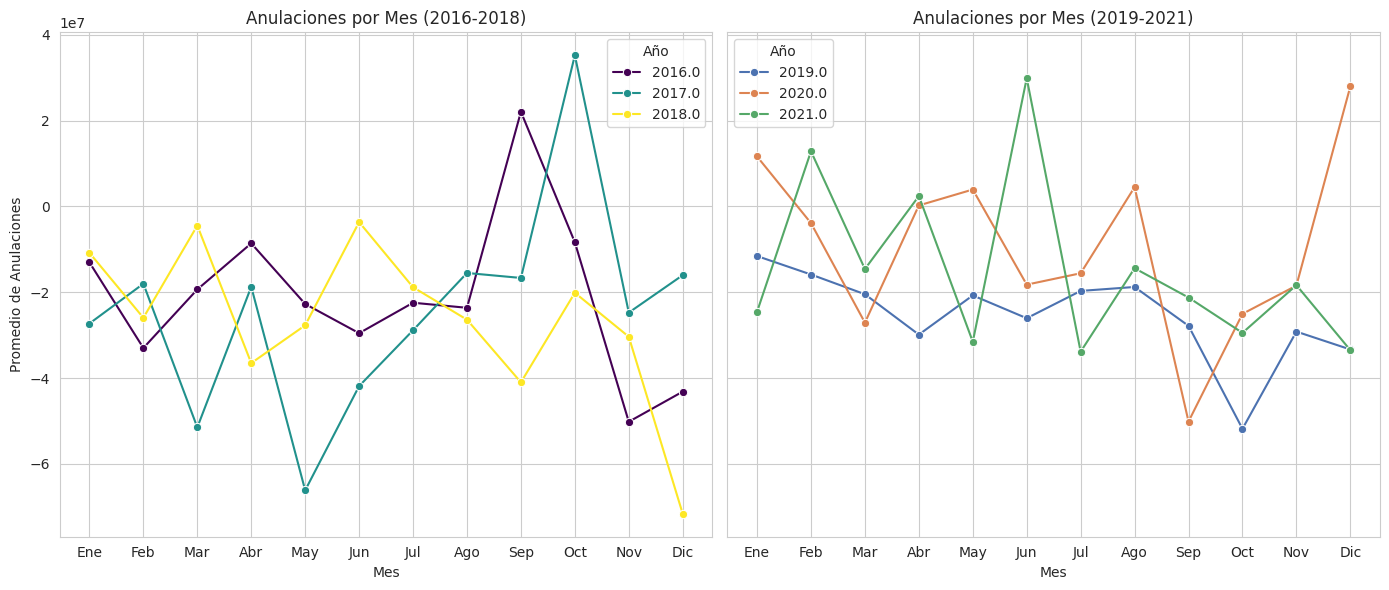

In [60]:

# Convertir fecha a datetime
df["FECHA_CORTE"] = pd.to_datetime(df["FECHA_CORTE"], dayfirst=True, errors='coerce')

# Crear columnas de Año y Mes
df["AÑO"] = df["FECHA_CORTE"].dt.year
df["MES"] = df["FECHA_CORTE"].dt.month

# Agrupar por Año y Mes
df_grouped = df.groupby(["AÑO", "MES"])["ANULACIONES"].mean().reset_index()

# Separar en dos grupos de años
grupo1 = df_grouped[df_grouped["AÑO"].between(2016, 2018)]
grupo2 = df_grouped[df_grouped["AÑO"].between(2019, 2021)]

# Crear figura con dos subgráficos
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Gráfico 1 (2016-2020)
sns.lineplot(
    data=grupo1, x="MES", y="ANULACIONES", hue="AÑO", marker="o", palette="viridis", ax=axes[0]
)
axes[0].set_title("Anulaciones por Mes (2016-2018)")
axes[0].set_xlabel("Mes")
axes[0].set_ylabel("Promedio de Anulaciones")
axes[0].set_xticks(range(1, 13))
axes[0].set_xticklabels(["Ene", "Feb", "Mar", "Abr", "May", "Jun", "Jul", "Ago", "Sep", "Oct", "Nov", "Dic"])
axes[0].legend(title="Año")

# Gráfico 2 (2021-2025)
sns.lineplot(
    data=grupo2, x="MES", y="ANULACIONES", hue="AÑO", marker="o", palette="deep", ax=axes[1]
)
axes[1].set_title("Anulaciones por Mes (2019-2021)")
axes[1].set_xlabel("Mes")
axes[1].set_ylabel("")
axes[1].set_xticks(range(1, 13))
axes[1].set_xticklabels(["Ene", "Feb", "Mar", "Abr", "May", "Jun", "Jul", "Ago", "Sep", "Oct", "Nov", "Dic"])
axes[1].legend(title="Año")

# Ajustar diseño y mostrar
plt.tight_layout()
plt.show()


### **Retiros y Redenciones por Mes**

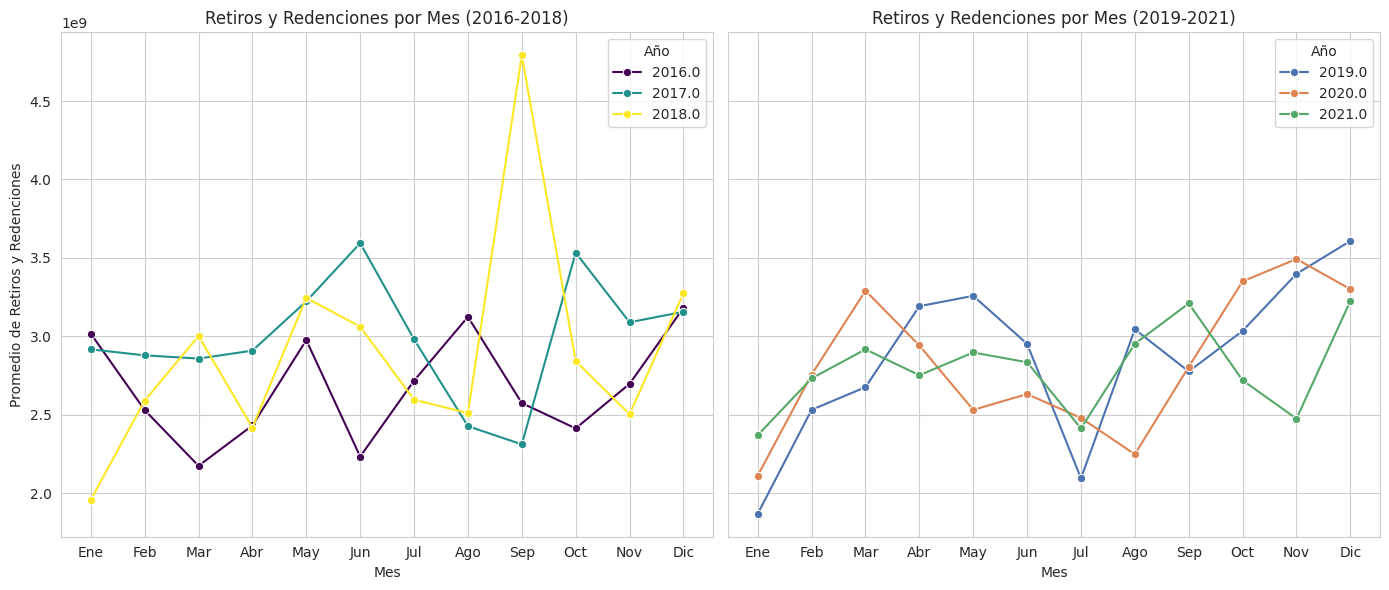

In [71]:

# Convertir fecha a datetime
df["FECHA_CORTE"] = pd.to_datetime(df["FECHA_CORTE"], dayfirst=True, errors='coerce')

# Crear columnas de Año y Mes
df["AÑO"] = df["FECHA_CORTE"].dt.year
df["MES"] = df["FECHA_CORTE"].dt.month

# Agrupar por Año y Mes
df_grouped = df.groupby(["AÑO", "MES"])["RETIROS_REDENCIONES"].mean().reset_index()

# Separar en dos grupos de años
grupo1 = df_grouped[df_grouped["AÑO"].between(2016, 2018)]
grupo2 = df_grouped[df_grouped["AÑO"].between(2019, 2021)]

# Crear figura con dos subgráficos
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)

# Gráfico 1 (2016-2020)
sns.lineplot(
    data=grupo1, x="MES", y="RETIROS_REDENCIONES", hue="AÑO", marker="o", palette="viridis", ax=axes[0]
)
axes[0].set_title("Retiros y Redenciones por Mes (2016-2018)")
axes[0].set_xlabel("Mes")
axes[0].set_ylabel("Promedio de Retiros y Redenciones")
axes[0].set_xticks(range(1, 13))
axes[0].set_xticklabels(["Ene", "Feb", "Mar", "Abr", "May", "Jun", "Jul", "Ago", "Sep", "Oct", "Nov", "Dic"])
axes[0].legend(title="Año")

# Gráfico 2 (2021-2025)
sns.lineplot(
    data=grupo2, x="MES", y="RETIROS_REDENCIONES", hue="AÑO", marker="o", palette="deep", ax=axes[1]
)
axes[1].set_title("Retiros y Redenciones por Mes (2019-2021)")
axes[1].set_xlabel("Mes")
axes[1].set_ylabel("")
axes[1].set_xticks(range(1, 13))
axes[1].set_xticklabels(["Ene", "Feb", "Mar", "Abr", "May", "Jun", "Jul", "Ago", "Sep", "Oct", "Nov", "Dic"])
axes[1].legend(title="Año")

# Ajustar diseño y mostrar
plt.tight_layout()
plt.show()
